# Implementação de algoritmo para usar as classes de simulação de array de microfones e GSC para o SESA Dataset

A ideia desse jupyter é criar um algoritmo que, dadas a pasta de origem e as de destino, simule um array de microfones com os áudios da pasta de origem e salve os sinais sem beamforming, com beamforming e com GSC nas pastas de destino.

In [1]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import scipy

#### Importando as classes criadas

In [2]:
import sys
sys.path.append('/home/dimi/Programming/IC2019/DOA/Python')

from GeneralizedSidelobeCancellerClass import GeneralizedSidelobeCanceller
from SimularArrayMicrofonesClass import SimularArrayMicrofones

## Definindo uma boa amplitude para o ruído

In [3]:
def gerarRuidoBranco(qtdAmostras, amplitude):
    
    media        = 0
    desvioPadrao = 1
    
    return amplitude * np.random.normal(media, desvioPadrao, size=qtdAmostras)

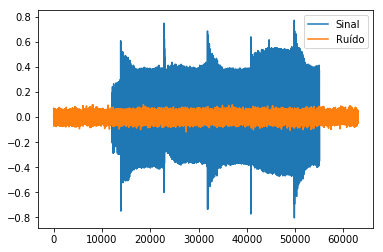

In [4]:
caminho = "/home/dimi/Downloads/SESA/test/siren_035.wav"
sinalOriginal, freqAmostragem = librosa.load(caminho, sr=None, mono=True)
ruido = gerarRuidoBranco(len(sinalOriginal), 0.025)

plt.plot(sinalOriginal, label="Sinal")
plt.plot(ruido, label="Ruído")
plt.legend()
plt.show()

## Rodando o algoritmo

#### Definindo os parâmetros iniciais desse algoritmo

In [5]:
pastaOrigem                = '/home/dimi/Downloads/SESA/test/'
pastaDestinoSemBeamforming = '/home/dimi/Downloads/SESA/outros/ruido_0025/testeSemBeamforming/'
pastaDestinoBeamforming    = '/home/dimi/Downloads/SESA/outros/ruido_0025/testeBeamforming/'
pastaDestinoGSC            = '/home/dimi/Downloads/SESA/outros/ruido_0025/testeGSC/'

#### Definindo os parâmetros iniciais da classe de simulação de array de microfones

In [6]:
qtdMics        = 4
amplitudeRuido = 0.025

#### Rodando o algoritmo

In [7]:
# LISTANDO OS ARQUIVOS NO DIRETORIO DE ORIGEM
arrayArquivos = os.listdir(pastaOrigem)
totalArquivos = len(arrayArquivos)

# CRIANDO UM ARRAY PRA ARMAZENAR OS TEMPOS DE PROCESSAMENTO
arrayTempoProcessamentoGSC = []

# PARA CADA ARQUIVO NA PASTA DE ORIGEM
for i, arquivoAtual in enumerate(arrayArquivos):
    
        print("\n" + arquivoAtual + ": arquivo " + str(i+1) + " de " + str(totalArquivos) + " -> " + str(100*((i+1)/totalArquivos)) + "%")
        
        # EU SIMULO UM ARRAY DE MICROFONES
        caminhoArquivo = pastaOrigem + arquivoAtual
        objSimularArrayMics = SimularArrayMicrofones(caminhoArquivo, qtdMics, amplitudeRuido)
        arraySinaisSimulados, arrayDelays, freqAmostragem = objSimularArrayMics.obterResultado()
        
        # APLICO O BEAMFORMING E GSC
        objGSC = GeneralizedSidelobeCanceller(arraySinaisSimulados, arrayDelays)
        sinalSemBeamforming, sinalBeamformado, sinalFinalGSC = objGSC.obterSinaisResultantes()
        arrayTempoProcessamentoGSC.append(objGSC.tempoProcessamentoGSC)
        
        # E POR FIM SALVO NAS PASTAS DE DESTINO
        librosa.output.write_wav(pastaDestinoSemBeamforming + arquivoAtual, sinalSemBeamforming, freqAmostragem)
        librosa.output.write_wav(pastaDestinoBeamforming + arquivoAtual, sinalBeamformado, freqAmostragem)
        librosa.output.write_wav(pastaDestinoGSC + arquivoAtual, sinalFinalGSC, freqAmostragem)


explosion_182.wav: arquivo 1 de 105 -> 0.9523809523809524%
Iniciando a filtragem adaptativa com LMS
Tempo total gasto para processar o GSC completo (segundos): 3.6141698360443115

gunshot_027.wav: arquivo 2 de 105 -> 1.9047619047619049%
Iniciando a filtragem adaptativa com LMS
Tempo total gasto para processar o GSC completo (segundos): 6.6160430908203125

explosion_031.wav: arquivo 3 de 105 -> 2.857142857142857%
Iniciando a filtragem adaptativa com LMS
Tempo total gasto para processar o GSC completo (segundos): 2.800558567047119

gunshot_032.wav: arquivo 4 de 105 -> 3.8095238095238098%
Iniciando a filtragem adaptativa com LMS
Tempo total gasto para processar o GSC completo (segundos): 2.906298875808716

gunshot_084.wav: arquivo 5 de 105 -> 4.761904761904762%
Iniciando a filtragem adaptativa com LMS
Tempo total gasto para processar o GSC completo (segundos): 3.1332952976226807

casual_035.wav: arquivo 6 de 105 -> 5.714285714285714%
Iniciando a filtragem adaptativa com LMS
Tempo total g

Tempo total gasto para processar o GSC completo (segundos): 1.1869101524353027

explosion_191.wav: arquivo 48 de 105 -> 45.714285714285715%
Iniciando a filtragem adaptativa com LMS
Tempo total gasto para processar o GSC completo (segundos): 5.41901421546936

siren_042.wav: arquivo 49 de 105 -> 46.666666666666664%
Iniciando a filtragem adaptativa com LMS
Tempo total gasto para processar o GSC completo (segundos): 20.13111710548401

explosion_156.wav: arquivo 50 de 105 -> 47.61904761904761%
Iniciando a filtragem adaptativa com LMS
Tempo total gasto para processar o GSC completo (segundos): 58.64471483230591

explosion_079.wav: arquivo 51 de 105 -> 48.57142857142857%
Iniciando a filtragem adaptativa com LMS
Tempo total gasto para processar o GSC completo (segundos): 1.8973429203033447

gunshot_091.wav: arquivo 52 de 105 -> 49.523809523809526%
Iniciando a filtragem adaptativa com LMS
Tempo total gasto para processar o GSC completo (segundos): 0.987628698348999

siren_099.wav: arquivo 53 de

Tempo total gasto para processar o GSC completo (segundos): 1.7822597026824951

siren_071.wav: arquivo 95 de 105 -> 90.47619047619048%
Iniciando a filtragem adaptativa com LMS
Tempo total gasto para processar o GSC completo (segundos): 17.8787739276886

casual_044.wav: arquivo 96 de 105 -> 91.42857142857143%
Iniciando a filtragem adaptativa com LMS
Tempo total gasto para processar o GSC completo (segundos): 5.935721158981323

gunshot_041.wav: arquivo 97 de 105 -> 92.38095238095238%
Iniciando a filtragem adaptativa com LMS
Tempo total gasto para processar o GSC completo (segundos): 7.80113673210144

casual_027.wav: arquivo 98 de 105 -> 93.33333333333333%
Iniciando a filtragem adaptativa com LMS
Tempo total gasto para processar o GSC completo (segundos): 6.689063549041748

explosion_186.wav: arquivo 99 de 105 -> 94.28571428571428%
Iniciando a filtragem adaptativa com LMS
Tempo total gasto para processar o GSC completo (segundos): 1.6913776397705078

gunshot_098.wav: arquivo 100 de 105 ->

#### Verificando como foi o tempo de processamento

In [8]:
print("Tempo médio (seg):\t", np.mean(arrayTempoProcessamentoGSC))
print("Tempo mínimo (seg):\t", np.amin(arrayTempoProcessamentoGSC))
print("Tempo máximo (seg):\t", np.amax(arrayTempoProcessamentoGSC))
print("Desvio padrão (seg):\t", np.std(arrayTempoProcessamentoGSC))
print("Tempo total (min):\t", np.sum(arrayTempoProcessamentoGSC)/60)

Tempo médio (seg):	 7.764433924357096
Tempo mínimo (seg):	 0.7903821468353271
Tempo máximo (seg):	 93.62807083129883
Desvio padrão (seg):	 12.423206040589541
Tempo total (min):	 13.587759367624919
